In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
# Read in data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../input/amazon-fine-food-reviews/Reviews.csv'

In [6]:
df.head()

NameError: name 'df' is not defined

In [7]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

NameError: name 'df' is not defined

In [8]:
example = df['Text'][50]
print(example)

NameError: name 'df' is not defined

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

NameError: name 'example' is not defined

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

NameError: name 'tokens' is not defined

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

NameError: name 'tagged' is not defined

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\sutar/nltk_data'
    - 'C:\\Users\\sutar\\anaconda3\\nltk_data'
    - 'C:\\Users\\sutar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\sutar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\sutar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [14]:
sia.polarity_scores('I am so happy!')

NameError: name 'sia' is not defined

In [15]:
sia.polarity_scores('This is the worst thing ever.')

NameError: name 'sia' is not defined

In [16]:
sia.polarity_scores(example)

NameError: name 'sia' is not defined

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

NameError: name 'df' is not defined

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

NameError: name 'df' is not defined

In [19]:
vaders.head()

,Id


In [20]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

ValueError: Could not interpret input 'Score'

ValueError: Could not interpret input 'Score'

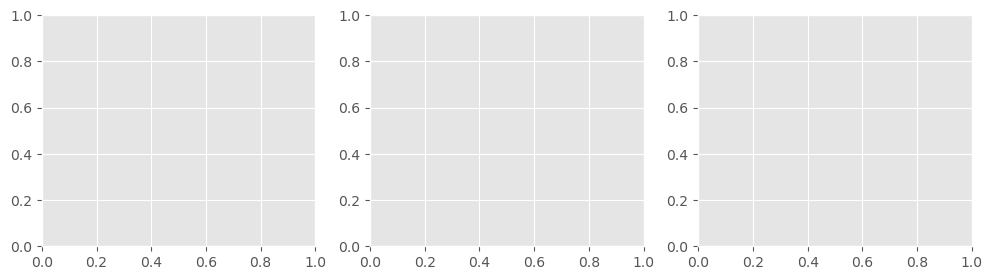

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


ImportError: cannot import name 'AutoModelForSequenceClassification' from 'transformers' (C:\Users\sutar\anaconda3\Lib\site-packages\transformers\__init__.py)

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

OSError: Model name 'cardiffnlp/twitter-roberta-base-sentiment' was not found in tokenizers model name list (roberta-base, roberta-large, roberta-large-mnli). We assumed 'cardiffnlp/twitter-roberta-base-sentiment' was a path or url to a directory containing vocabulary files named ['vocab.json', 'merges.txt'] but couldn't find such vocabulary files at this path or url.

In [24]:
# VADER results on example
print(example)
sia.polarity_scores(example)

NameError: name 'example' is not defined

In [25]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

NameError: name 'tokenizer' is not defined

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

NameError: name 'df' is not defined

In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

NameError: name 'df' is not defined

In [29]:
results_df.columns

Index(['Id'], dtype='object')

KeyError: 'Score'

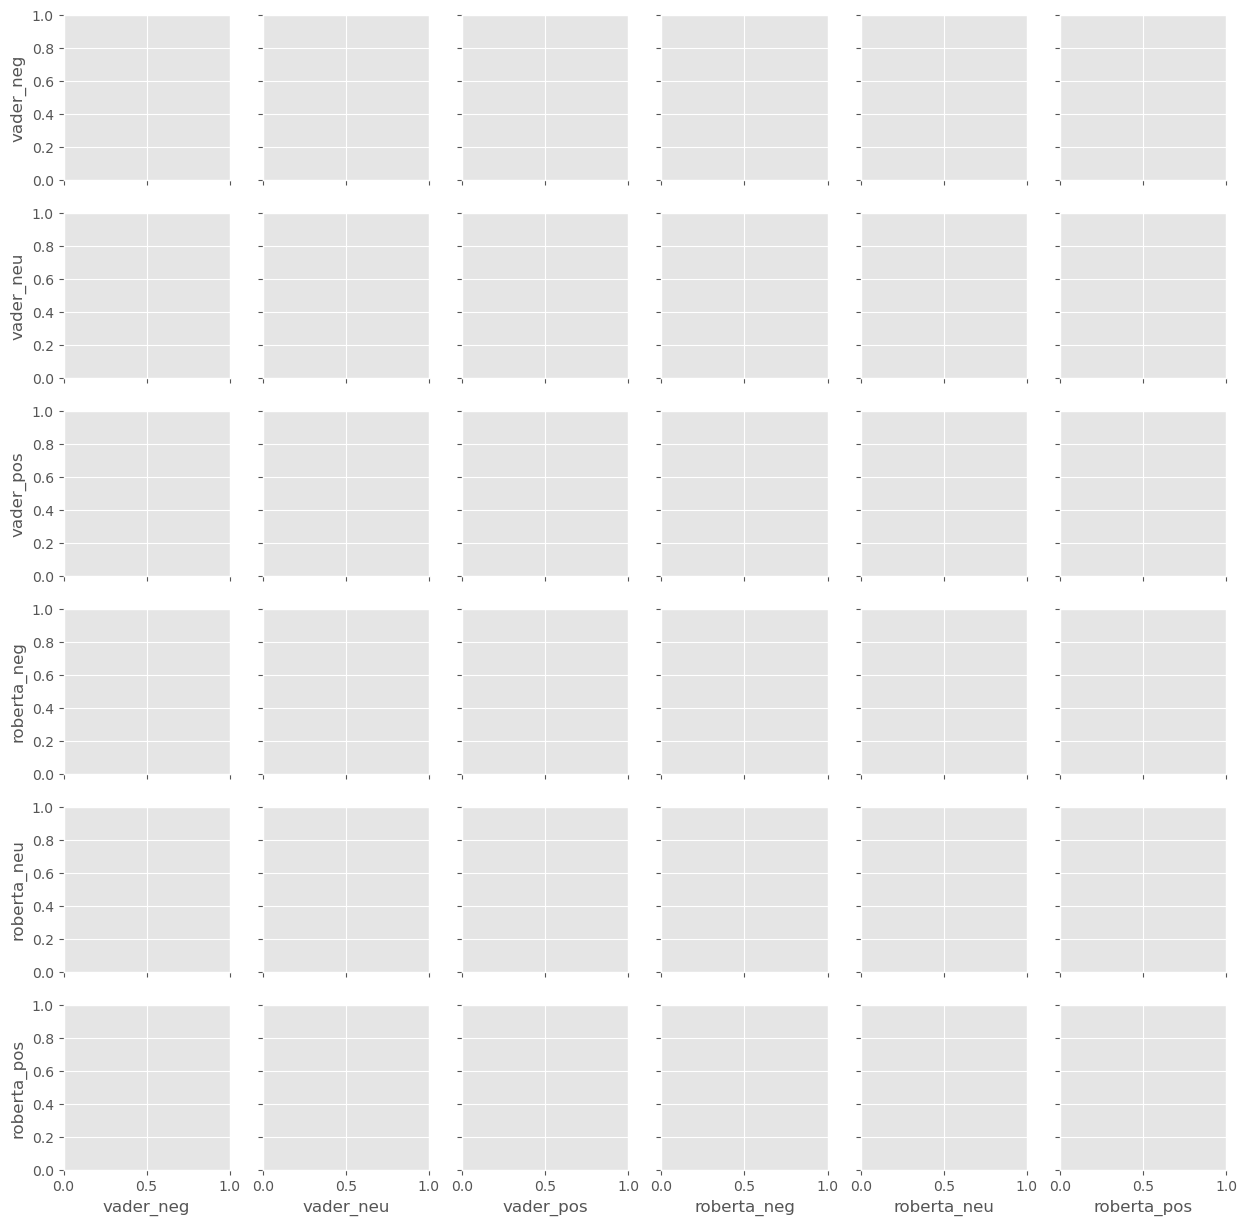

In [30]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [31]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

UndefinedVariableError: name 'Score' is not defined

In [32]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

UndefinedVariableError: name 'Score' is not defined

In [33]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

UndefinedVariableError: name 'Score' is not defined

In [34]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

UndefinedVariableError: name 'Score' is not defined

In [35]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

ImportError: cannot import name 'pipeline' from 'transformers' (C:\Users\sutar\anaconda3\Lib\site-packages\transformers\__init__.py)

In [36]:
sent_pipeline('I love sentiment analysis!')

NameError: name 'sent_pipeline' is not defined

In [37]:
sent_pipeline('Make sure to like and subscribe!')

NameError: name 'sent_pipeline' is not defined